In [256]:
import pandas as pd
import matplotlib.pyplot as plt

In [257]:
import numpy as np

In [258]:
df = pd.read_csv('checkins.csv', header=0, sep='|', encoding ='cp1251')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021968 entries, 0 to 1021967
Data columns (total 6 columns):
   id                    1021968 non-null object
 user_id                 1021966 non-null float64
 venue_id                1021966 non-null float64
     latitude            1021966 non-null object
     longitude           1021966 non-null object
     created_at          1021966 non-null object
dtypes: float64(2), object(4)
memory usage: 31.2+ MB


In [260]:
df = df.dropna()
df.columns

Index([u'   id    ', u' user_id ', u' venue_id ', u'     latitude      ',
       u'     longitude     ', u'     created_at      '],
      dtype='object')

In [261]:
mask = np.where(df[u'     longitude     '] == u'                   ')

In [262]:
print mask

(array([      0,       2,       4, ..., 1021958, 1021963, 1021965]),)


In [263]:
df[:7]

,id,user_id,venue_id,latitude,longitude,created_at
1,984301,2041916.0,5222.0,,,2012-04-21 17:39:01
2,984222,15824.0,5222.0,38.8951118,-77.0363658,2012-04-21 17:43:47
3,984315,1764391.0,5222.0,,,2012-04-21 17:37:18
4,984234,44652.0,5222.0,33.800745,-84.41052,2012-04-21 17:43:43
5,984249,2146840.0,5222.0,,,2012-04-21 17:42:58
6,984268,2146843.0,5222.0,,,2012-04-21 17:42:38
7,984281,2146846.0,5222.0,,,2012-04-21 17:39:40


In [264]:
df = df.loc[df[u'     longitude     '] != u'                   ']

In [265]:
df1 = df[:100000]
df1 = df.convert_objects(convert_numeric=True)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [266]:
del df1[u'     created_at      ']
del df1[u'   id    ']
del df1[u' user_id ']
del df1[u' venue_id ']

In [267]:
df1.info()
df1[:10]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396634 entries, 2 to 1021965
Data columns (total 2 columns):
     latitude          396634 non-null float64
     longitude         396634 non-null float64
dtypes: float64(2)
memory usage: 9.1 MB


,latitude,longitude
2,38.895112,-77.036366
4,33.800745,-84.410520
8,45.523452,-122.676207
10,40.764462,-111.904565
11,33.448377,-112.074037
12,32.221743,-110.926479
13,40.650000,-73.950000
14,33.448377,-112.074037
16,33.414768,-111.909309
19,42.358431,-71.059773


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396634 entries, 2 to 1021965
Data columns (total 2 columns):
     latitude          396634 non-null float64
     longitude         396634 non-null float64
dtypes: float64(2)
memory usage: 9.1 MB


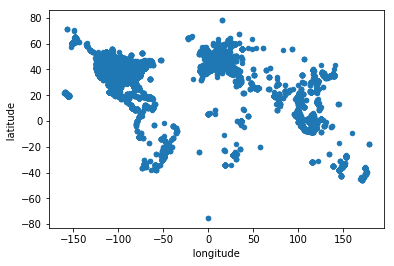

In [268]:
%matplotlib inline
#xx = np.array(df1[u'     latitude      '])
#yy= np.array(df1[u'     longitude     '])
#print xx
#print yy
#print df1[:7]
df1.info()
df1.plot(x=u'     longitude     ', y = u'     latitude      ' , kind = 'scatter')

In [269]:
from sklearn.cluster import MeanShift

In [270]:
model = MeanShift(bandwidth=0.1)
#preds = model.fit_predict(df1)

In [272]:
centers = model.fit(df1[:100000])

In [273]:
centers1 = centers.cluster_centers_
print centers1
len(centers1)
xx = []
yy = []
for j in range(len(centers1)):
    xx.append(centers1[j][0])
    yy.append(centers1[j][1])
    

[[  40.7177164   -73.99183542]
 [  33.44943805 -112.00213969]
 [  33.44638027 -111.90188756]
 ..., 
 [  46.7323875  -117.0001651 ]
 [  29.6899563   -95.8996757 ]
 [  31.3787916   -95.3213317 ]]


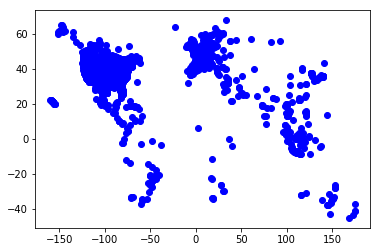

In [274]:
#print xx[:10]
#print yy[:10]
plt.plot(yy, xx,'bo')
plt.show()

In [293]:
office = [[34.234435,-118.560834],
          [49.2534648,-123.1292725],
          [34.272271,-118.469145],
          [30.0055101,-90.2378093],
          [33.7517479,-118.190918],
          [34.2010298,-118.4409703],
          [29.9405778,-90.0615309],
          [49.2518957,-123.1276499],
          [34.0268019,-118.2190251],
          [33.102383,-96.8146629],
          [38.20115,-85.814593],
          [29.95889,-90.091945],
          [25.8072615,-80.3357092],
          [34.035983,-118.4713336],
          [28.4165793,-80.6265693],
          [30.4851903,-84.2380477],
          [34.272271,-118.469145],
          [34.272271,-118.469145],
          [34.272271,-118.469145],
          [34.272271,-118.469145],
          [34.272271,-118.469145],
          [34.272271,-118.469145],
          [34.272271,-118.469145],
          [-33.868457, 151.205134],
          [39.366487, 117.036146],
          [52.378894, 4.885084],
          [51.503016, -0.075479],
          [25.867736, -80.324116],
          [33.751277, -118.188740],]

In [295]:
z = 5.0
z1 = 0.0
for k in office:
    #print 'k',k[0], k[1]
    for i in range(len(centers1)):
        #print 'before',xx[i]-k[0], (xx[i]-k[0])**2, np.sqrt((xx[i]-k[0])**2+(yy[i]-k[1])**2)
        z1 = np.sqrt((xx[i]-k[0])**2+(yy[i]-k[1])**2)
        #print z, z1
        if z1 < z:
            z=z1
            number = i
            #print 'after'
            #print z, i
            #print 'x',xx[i], k[0]
            #print 'y',yy[i], k[1]
            #print 'sqrt', z1
    print 'точка', xx[number], yy[number],
    print z*100 
    z1 = 0.0
    z = 5.0
    number = 0

точка 34.1981820709 -118.549276808 3.80505395264
точка 49.2401719783 -123.111860223 2.19063120477
точка 34.1981820709 -118.549276808 10.9134211105
точка 29.9867312917 -90.2039336556 3.87324531749
точка 33.8098779553 -118.148923807 7.17120323121
точка 34.1981820709 -118.549276808 10.8343939346
точка 29.966228186 -90.0772990205 3.01093992506
точка 49.2401719783 -123.111860223 1.96662034449
точка 34.0603975546 -118.248709027 4.48308320817
точка 33.136918969 -96.8482683775 4.81877709733
точка 38.2534614149 -85.759421314 7.60289356913
точка 29.966228186 -90.0772990205 1.63815045011
точка 25.8456722643 -80.3188905964 4.1931518445
точка 34.0354869531 -118.438997719 3.23396851053
точка 28.3297016724 -80.6728876966 9.84536237735
точка 30.4416425602 -84.2858799458 6.4686392501
точка 34.1981820709 -118.549276808 10.9134211105
точка 34.1981820709 -118.549276808 10.9134211105
точка 34.1981820709 -118.549276808 10.9134211105
точка 34.1981820709 -118.549276808 10.9134211105
точка 34.1981820709 -118.5